# Deck 281 Explore

In [1]:
import pandas as pd
import os
import datetime

filein = '/Volumes/MobileSSD/in_and_outbox/data_sets/ICOADS/Deck281/ICOADS_R3.0_Rqst493125_19260101-19450831.csv'

In [12]:
df = pd.read_csv(filein, error_bad_lines=False, parse_dates=True)


In [24]:
df

,YR,MO,DY,HR,LAT,LON,SLP,AT,SST,DCK,SID,PT,UID,RN1,RN2,RN3,RSA,IRF
0,1926,1,1,11.0,41.5,315.5,1022.7,NaN,NaN,281,1,0,0ELU56,3,1,0,2,1
1,1926,1,1,15.0,41.5,315.5,1018.3,NaN,NaN,281,1,0,0ELUIB,3,1,0,2,1
2,1926,1,1,16.0,33.5,242.5,1015.9,14.4,NaN,281,1,0,0ELUK6,3,1,0,2,1
3,1926,1,1,19.0,41.5,315.5,1013.5,NaN,NaN,281,1,0,0ELUPV,3,1,0,2,1
4,1926,1,1,20.0,33.5,242.5,1015.9,18.3,NaN,281,1,0,0ELURP,3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186489,1945,8,30,23.0,17.5,140.5,1009.5,30.0,29.4,281,1,0,0N74SD,3,1,0,2,1
186490,1945,8,31,0.0,51.5,180.5,1015.0,12.8,NaN,281,1,0,0N74T7,3,1,0,2,1
186491,1945,8,31,3.0,17.5,140.5,1008.8,29.4,29.4,281,1,0,0N753O,3,1,0,2,1
186492,1945,8,31,4.0,50.5,181.5,1015.0,11.1,NaN,281,1,0,0N754B,3,1,0,2,1


In [15]:
df_subset = df.loc[(df.YR == 1942) | (df.YR == 1943) | (df.YR == 1943)]

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [5]:
#define the basic map projection information and figure size

def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(20.5, 5.25),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

#download land mask
# 50m is a good balance between dataset size and land feature resolution
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor='1.0')

/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:360: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


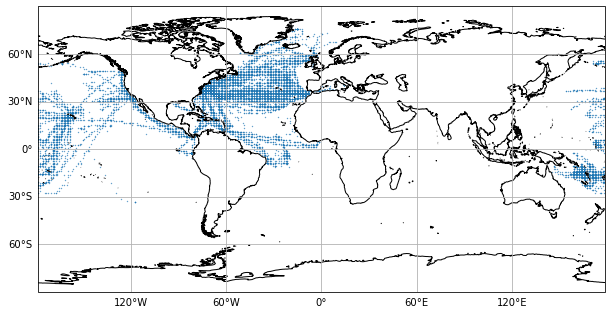

In [16]:
t= df_subset

fig,ax = make_map()
ax.scatter(t.LON,t.LAT,.1)

ax.set_extent([-179,179,90,-90])
ax.add_feature(land_50m)
ax.coastlines(resolution='50m')
